In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
from calculations import *
from plot_helper import *
import matplotlib.patches as patches
import PIL
import cv2 

model = YOLO("models/WhatsappWindow_Models/v4.pt")

In [2]:
monitor_resoution = (2880, 1864)
current_shape = (1920,1080)
image_path = "testing_image/ss3.png"
original_size = 896
resized_size = closestNumber(min(monitor_resoution), 32)

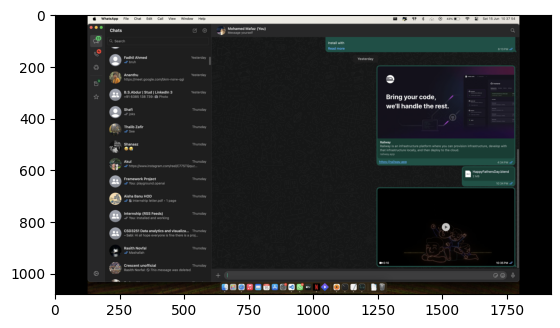

In [3]:
plt.imshow(resize_and_center_image(image_path=image_path, target_shape=current_shape))


0: 672x1024 2 windows, 1549.7ms
Speed: 10.4ms preprocess, 1549.7ms inference, 11.8ms postprocess per image at shape (1, 3, 672, 1024)


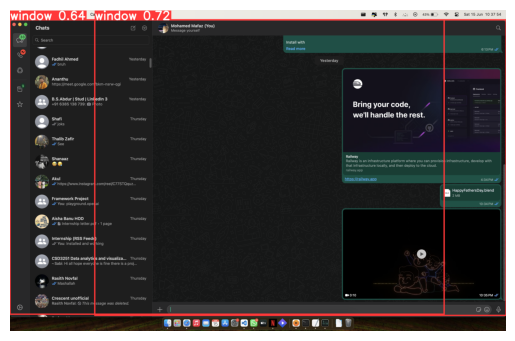

In [4]:
plot, bbox = plot_bbox_pred(image_path=image_path, model=model)
plt.imshow(plot)


0: 576x1024 1 window, 1287.5ms
Speed: 6.5ms preprocess, 1287.5ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)


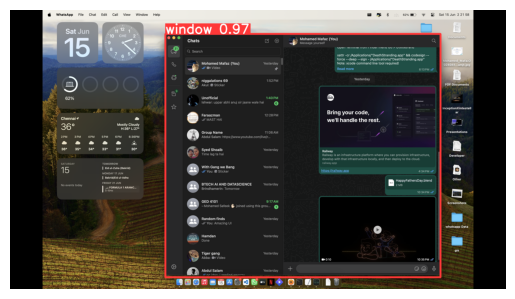

In [5]:
image_path = "testing_image/ss.png"
plot, boxes = predict_and_show(model = model, image_path=image_path, target_shape=current_shape)

In [6]:
# plot_bbox_pred is almost as same as predict_and_show, but in predict_and_show you can set resolution and predict
# best to match the closest to training images

Shape: (1644, 1897, 3)


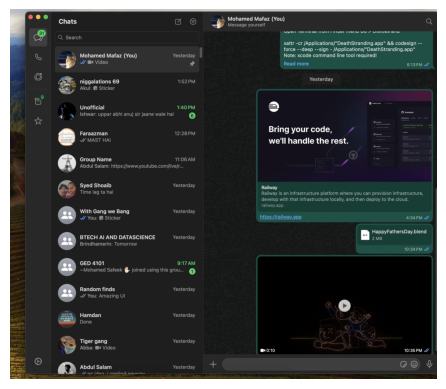

In [8]:
image_cropped = crop_resizebbox(image_path="testing_image/ss.png", current_shape=current_shape
                 ,target_shape=monitor_resoution, boxes_xyxy=boxes.xyxy[0], margin_shape = (150,10))

plt.imshow(image_cropped)
plt.axis("off")
plt.imsave("testing output images/output3.png", image_cropped)